**1941개의 샘플**

- 종속변수(7개, 어떠한 불량인지): Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps, Other_Faults

- 데이터출처: https://www.kaggle.com/mahsateimourikia/faults-nna/notebooks



In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

path = "/content/drive/MyDrive/P3C1"
file_list = os.listdir(path)
print ("file_list: {}".format(file_list))

file_list: ['Faults27x7_var', 'Faults.NNA']


In [3]:
os.chdir('/content/drive/MyDrive/P3C1/')

In [4]:
import pandas as pd 
import numpy as np

In [5]:
# TSV(콤마 대신 Tab으로 컬럼을 분리하는 파일포맷) 파일이므로 delimiter='\t' 옵션 지정
# 컬럼명이 없는 파일이므로 header=None 옵션 지정

df = pd.read_csv('Faults.NNA',  delimiter='\t', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [6]:
columns_name=pd.read_csv('Faults27x7_var',  delimiter=' ', header=None)
columns_name

,0
0,X_Minimum
1,X_Maximum
2,Y_Minimum
3,Y_Maximum
4,Pixels_Areas
5,X_Perimeter
6,Y_Perimeter
7,Sum_of_Luminosity
8,Minimum_of_Luminosity
9,Maximum_of_Luminosity


In [8]:
df.columns = columns_name[0]
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [9]:
df.shape

(1941, 34)

In [10]:
# CPU 개수 확인

n_cpu = os.cpu_count()
print("The number of cpus: ", n_cpu)
n_thread = n_cpu * 2
print("Expected number of threads:", n_thread)

The number of cpus:  2
Expected number of threads: 4


## 데이터 전처리 및 탐색적 데이터 분석

### 종속변수 범주화

- 7개의 종속변수 Series를 list로 이어 붙여 길이 7짜리 list를 만들어 conditions라는 이름으로 저장

In [11]:
# 방법 1

conditions=[(df['Pastry'] == 1) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 0)& (df['Stains'] == 0)& (df['Dirtiness'] == 0)& (df['Bumps'] == 0)& (df['Other_Faults'] == 0), 
            (df['Pastry'] == 0) & (df['Z_Scratch'] == 1)& (df['K_Scatch'] == 0)& (df['Stains'] == 0)& (df['Dirtiness'] == 0)& (df['Bumps'] == 0)& (df['Other_Faults'] == 0),
            (df['Pastry'] == 0) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 1)& (df['Stains'] == 0)& (df['Dirtiness'] == 0)& (df['Bumps'] == 0)& (df['Other_Faults'] == 0),
            (df['Pastry'] == 0) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 0)& (df['Stains'] == 1)& (df['Dirtiness'] == 0)& (df['Bumps'] == 0)& (df['Other_Faults'] == 0),
            (df['Pastry'] == 0) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 0)& (df['Stains'] == 0)& (df['Dirtiness'] == 1)& (df['Bumps'] == 0)& (df['Other_Faults'] == 0),
            (df['Pastry'] == 0) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 0)& (df['Stains'] == 0)& (df['Dirtiness'] == 0)& (df['Bumps'] == 1)& (df['Other_Faults'] == 0),
            (df['Pastry'] == 0) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 0)& (df['Stains'] == 0)& (df['Dirtiness'] == 0)& (df['Bumps'] == 0)& (df['Other_Faults'] == 1)]

In [12]:
# 방법 2

conditions=[df['Pastry'].astype(bool),
            df['Z_Scratch'].astype(bool),
            df['K_Scatch'].astype(bool),
            df['Stains'].astype(bool),
            df['Dirtiness'].astype(bool),
            df['Bumps'].astype(bool),
            df['Other_Faults'].astype(bool)]

In [13]:
# 방법 3. list(map(함수, 리스트))

conditions=[
            df['Pastry'],
            df['Z_Scratch'],
            df['K_Scatch'],
            df['Stains'],
            df['Dirtiness'],
            df['Bumps'],
            df['Other_Faults'] 
]
conditions = list(map(lambda i: i.astype(bool), conditions))

In [14]:
print(conditions)

[0        True
1        True
2        True
3        True
4        True
        ...  
1936    False
1937    False
1938    False
1939    False
1940    False
Name: Pastry, Length: 1941, dtype: bool, 0       False
1       False
2       False
3       False
4       False
        ...  
1936    False
1937    False
1938    False
1939    False
1940    False
Name: Z_Scratch, Length: 1941, dtype: bool, 0       False
1       False
2       False
3       False
4       False
        ...  
1936    False
1937    False
1938    False
1939    False
1940    False
Name: K_Scatch, Length: 1941, dtype: bool, 0       False
1       False
2       False
3       False
4       False
        ...  
1936    False
1937    False
1938    False
1939    False
1940    False
Name: Stains, Length: 1941, dtype: bool, 0       False
1       False
2       False
3       False
4       False
        ...  
1936    False
1937    False
1938    False
1939    False
1940    False
Name: Dirtiness, Length: 1941, dtype: bool, 0       False
1 

In [15]:
print(type(conditions))
print(type(conditions[0]))
print(len(conditions))
print(len(conditions[0]))

<class 'list'>
<class 'pandas.core.series.Series'>
7
1941


In [16]:
# select 함수는 list 각 원소별로 TRUE인 것들의 값을 지정

choices = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
df['class'] = np.select(conditions, choices)
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,class
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0,Pastry


In [17]:
df['class'].value_counts()

Other_Faults    673
Bumps           402
K_Scatch        391
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
Name: class, dtype: int64

### 결측치 확인하기

In [18]:
df.isna().sum()

0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
class                    0
dtype: int64

### 기술통계량 파악하기
 - mean과 50% Quantile을 비교하여 분포의 치우침 정도를 파악  
 - min과 25% Quantile, max와 75% Quantile을 비교해 이상치 존재가능성에 대해서 파악

In [19]:
df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,1459.160227,0.400309,0.599691,78.737764,0.331715,0.414203,0.570767,0.033361,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,144.577823,0.490087,0.490087,55.086032,0.299712,0.137261,0.271058,0.058961,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.060400,0.315800,0.361300,0.006600,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,70.000000,0.227300,0.412100,0.555600,0.010100,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,1650.000000,1.000000,1.000000,80.000000,0.573800,0.501600,0.818200,0.023500,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.943900,1.000000,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 산점도를 통한 변수간의 상관관계 파악

In [20]:
import matplotlib.pyplot as plt

In [21]:
# get('Pastry') = 'Red'

color_code = {'Pastry':'Red', 'Z_Scratch':'Blue', 'K_Scatch':'Green', 'Stains':'Black', 'Dirtiness':'Pink', 'Bumps':'Brown', 'Other_Faults':'Gold'}
color_list = [color_code.get(i) for i in df.loc[ :, 'class']] 

In [22]:
color_list

['Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',


In [23]:
pd.plotting.scatter_matrix(df.loc[ :, df.columns != 'class'], c = color_list, figsize = [30,30], alpha = 0.3, s = 50, diagonal = 'hist');

Output hidden; open in https://colab.research.google.com to view.

In [24]:
import seaborn as sns

fig = plt.figure(figsize=(10, 50))
sns.pairplot(df.loc[ :, df.columns != 'class']);

Output hidden; open in https://colab.research.google.com to view.

### 상관계수를 활용한 변수간의 상관관계 파악 - heatmap

In [25]:
df.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults', 'class'],
      dtype='object', name=0)

In [26]:
df_cor = df[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']]

In [27]:
corr = df_cor.corr()
corr

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,,,,,,,,,,,,,,,,,,,,,,,,,,,
X_Minimum,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,0.316662,0.144319,-0.144319,0.136625,0.278075,-0.198461,0.063658,-0.361160,0.154778,0.367907,0.147282,-0.428553,-0.437944,-0.326851,0.178585,-0.031578,-0.355251
X_Maximum,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,0.299390,0.112009,-0.112009,0.106119,0.242846,-0.152680,0.048575,-0.214930,0.149259,0.271915,0.099253,-0.332169,-0.324012,-0.265990,0.115019,-0.038996,-0.286736
Y_Minimum,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,-0.049211,0.075164,-0.075164,-0.207640,0.021314,-0.043117,-0.006135,0.054165,0.066085,-0.036543,-0.062911,0.044952,0.070406,-0.008442,-0.086497,-0.090654,0.025257
Y_Maximum,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,-0.049219,0.075151,-0.075151,-0.207644,0.021300,-0.043085,-0.006152,0.054185,0.066051,-0.036549,-0.062901,0.044994,0.070432,-0.008382,-0.086480,-0.090666,0.025284
Pixels_Areas,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,-0.155853,-0.235591,0.235591,-0.183735,-0.275289,0.272808,0.017865,0.588606,-0.294673,-0.463571,-0.109655,0.650234,0.603072,0.578342,-0.137604,-0.043449,0.422947
X_Perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,-0.134240,-0.189250,0.189250,-0.147712,-0.227590,0.306348,0.004507,0.517098,-0.293039,-0.412100,-0.079106,0.563036,0.524716,0.523472,-0.101731,-0.032617,0.380605
Y_Perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,-0.063825,-0.095154,0.095154,-0.058889,-0.111240,0.188825,-0.047511,0.209160,-0.195162,-0.136723,0.013438,0.294040,0.228485,0.344378,0.031381,-0.047778,0.191772
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,-0.169331,-0.263632,0.263632,-0.204812,-0.301452,0.293691,0.049607,0.658339,-0.327728,-0.529745,-0.121090,0.712128,0.667736,0.618795,-0.158483,-0.014067,0.464248
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,-0.023579,0.042048,-0.042048,0.103393,0.358915,-0.044111,0.066748,-0.487574,0.252256,0.316610,0.035462,-0.678762,-0.567655,-0.588208,0.057123,0.669534,-0.514797


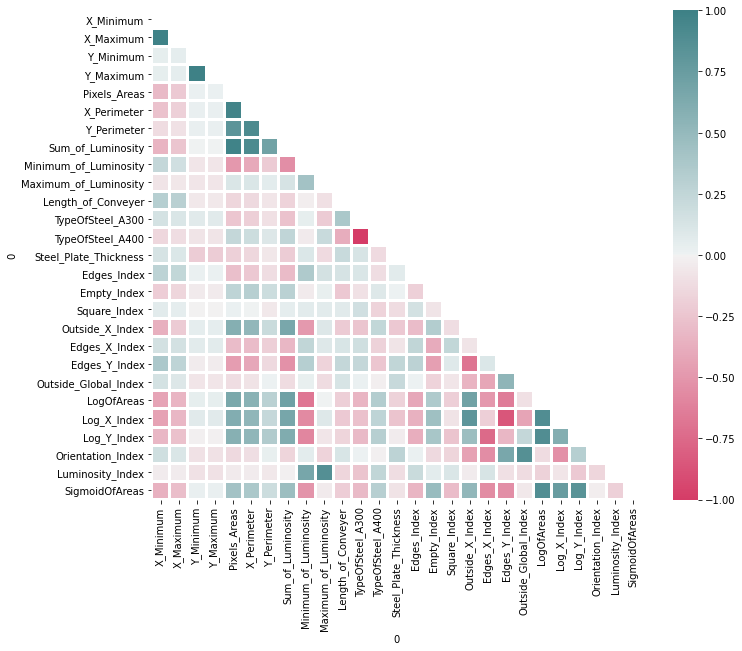

In [28]:
import seaborn as sns

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(1, 200, as_cmap=True)

plt.figure(figsize=(11,9))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, linewidths=2)

### 범주형 변수의 분포 시각화

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


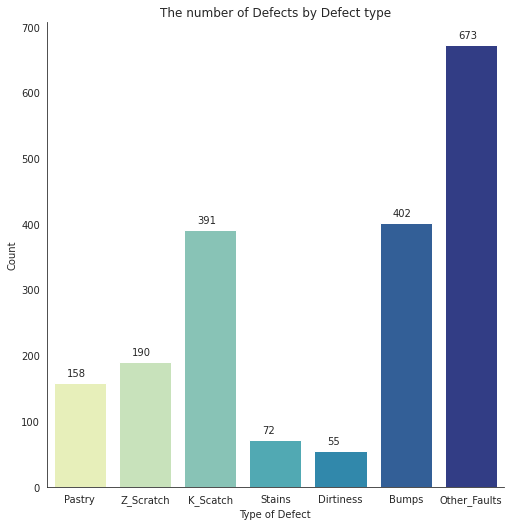

In [29]:
import seaborn as sns

sns.set_style("white") # darkgrid
g = sns.factorplot(x='class', data=df, kind='count', palette='YlGnBu', size=7)
g.ax.xaxis.set_label_text("Type of Defect")
g.ax.yaxis.set_label_text("Count")
g.ax.set_title("The number of Defects by Defect type")

# Barplot의 bar 상단에 값을 text로 달아주기
for i in g.ax.patches:
  g.ax.annotate( (i.get_height()) , (i.get_x()+0.2 ,i.get_height()+10) )

### Training, Test set 분리하기

In [30]:
x = df[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300',  'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']]
y = df['K_Scatch']

In [31]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [33]:
# 표준화

x_train = x_train.apply(zscore)
x_test = x_test.apply(zscore)

In [34]:
x_train.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03
mean,-1.213233e-16,-2.146050e-19,-1.881370e-17,-2.560953e-17,-1.001490e-17,-4.138299e-17,1.087667e-17,-2.353501e-17,2.148911e-16,-6.466584e-16,4.962382e-16,3.161847e-17,4.141876e-17,7.825928e-17,-1.226467e-16,6.717135e-17,-3.912964e-17,1.362384e-16,-2.306288e-16,-2.947242e-17,2.742651e-16,1.005782e-16,-1.280476e-17,1.645305e-17,4.921607e-17,1.347719e-16
std,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00
min,-1.103367e+00,-1.241076e+00,-9.104613e-01,-9.104788e-01,-3.483794e-01,-3.406371e-01,-1.767603e-01,-3.893515e-01,-2.643140e+00,-5.071400e+00,-1.605681e+00,-8.211077e-01,-6.967596e-01,-1.123421e+00,-3.018160e+00,-2.080335e+00,-5.289097e-01,-2.468152e+00,-3.280170e+00,-1.185811e+00,-2.774003e+00,-2.156377e+00,-3.067242e+00,-2.143465e+00,-5.839974e+00,-1.367353e+00
25%,-9.883000e-01,-8.621817e-01,-6.562362e-01,-6.562372e-01,-3.333730e-01,-3.004833e-01,-1.514077e-01,-3.719521e-01,-6.554519e-01,-3.480654e-01,-7.021989e-01,-8.211077e-01,-6.967596e-01,-9.210483e-01,-7.168723e-01,-7.749740e-01,-4.443167e-01,-7.982123e-01,-9.250766e-01,-1.185811e+00,-7.146692e-01,-6.985005e-01,-6.999318e-01,-8.252854e-01,-4.361607e-01,-9.978418e-01
50%,-2.637179e-01,-2.988794e-01,-2.545875e-01,-2.546108e-01,-3.171771e-01,-2.665069e-01,-1.260551e-01,-3.538504e-01,1.675751e-01,-1.851918e-01,-6.608181e-01,-8.211077e-01,-1.413845e-01,-3.492791e-01,-1.981697e-02,-2.493327e-02,-3.870920e-01,1.006070e-01,5.824951e-01,8.913658e-01,-3.182921e-01,-3.312158e-01,-1.668921e-01,2.490715e-02,-1.325061e-02,-2.443915e-01
75%,9.307593e-01,9.199295e-01,2.919470e-01,2.919292e-01,-2.027537e-01,-8.967550e-02,-1.144025e-02,-2.343737e-01,6.567327e-01,5.205939e-01,1.311669e+00,1.217867e+00,4.374056e-02,8.284349e-01,6.595150e-01,9.383813e-01,-1.623398e-01,7.575785e-01,7.858832e-01,8.913658e-01,5.254920e-01,3.829141e-01,7.329140e-01,8.448359e-01,4.324923e-01,1.226000e+00
max,2.180122e+00,2.203231e+00,6.155444e+00,6.155404e+00,2.758779e+01,3.192762e+01,3.817116e+01,2.140560e+01,3.661558e+00,6.601209e+00,2.304809e+00,1.217867e+00,4.116492e+00,2.211034e+00,3.880404e+00,1.563140e+00,1.397465e+01,1.578793e+00,7.858832e-01,8.913658e-01,3.420237e+00,3.627366e+00,6.274553e+00,1.830314e+00,5.180199e+00,1.226589e+00


## 로지스틱 분류 모형
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- 장점: 해석력이 좋음
- 단점: 모델의 complexity가 떨어져서 복잡한 데이터 패턴을 설명할 수 없음

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [36]:
lr = LogisticRegression(solver='liblinear') # penalty를 지정하지 않기 위해 liblinear 옵션 지정

### Grid Search 구축
- Penalty
  - L1: Lasso
  - L2: Lidge
- Threshold



In [37]:
# 딕셔너리 형태
# Grid Search: 우리가 Search하고자 하는 것들을 Grid 형태로 구성
# C: 클수록 회귀계수들이 가질 수 있는 값의 범위제한을 많이 가함
# tol: Threshold 값이 작을수록 베타값이 아주 미세하게 변할 때 멈춤, 클수록 어느정도 수렴하면 멈춤

parameters = {'penalty':['l1','l2'],'C':[0.01,0.1,0.5,0.9,1,5,10],'tol':[1e-4,1e-2,1,1e2]}  # 1e-4: 10의 마이너스 4승
GSLR = GridSearchCV(lr, parameters, cv=10, n_jobs=n_thread, scoring="accuracy")  # cv=10: 10등분하여 교차검증

In [38]:
# 학습하기

GSLR.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=4,
             param_grid={'C': [0.01, 0.1, 0.5, 0.9, 1, 5, 10],
                         'penalty': ['l1', 'l2'],
                         'tol': [0.0001, 0.01, 1, 100.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [39]:
# 최적의 파라미터 값 및 정확도(Accuracy) 출력

print('final params', GSLR.best_params_)   
print('ACC.', GSLR.best_score_)  

final params {'C': 1, 'penalty': 'l2', 'tol': 0.0001}
ACC. 0.9722911497105045


In [42]:
means = GSLR.cv_results_['mean_test_score']
stds = GSLR.cv_results_['std_test_score']
params = GSLR.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print("%.3f (+/-%.3f) for %r"
          %(mean, std * 2, param))

0.945 (+/-0.037) for {'C': 0.01, 'penalty': 'l1', 'tol': 0.0001}
0.945 (+/-0.036) for {'C': 0.01, 'penalty': 'l1', 'tol': 0.01}
0.939 (+/-0.037) for {'C': 0.01, 'penalty': 'l1', 'tol': 1}
0.798 (+/-0.005) for {'C': 0.01, 'penalty': 'l1', 'tol': 100.0}
0.949 (+/-0.031) for {'C': 0.01, 'penalty': 'l2', 'tol': 0.0001}
0.949 (+/-0.031) for {'C': 0.01, 'penalty': 'l2', 'tol': 0.01}
0.952 (+/-0.034) for {'C': 0.01, 'penalty': 'l2', 'tol': 1}
0.798 (+/-0.005) for {'C': 0.01, 'penalty': 'l2', 'tol': 100.0}
0.964 (+/-0.028) for {'C': 0.1, 'penalty': 'l1', 'tol': 0.0001}
0.963 (+/-0.028) for {'C': 0.1, 'penalty': 'l1', 'tol': 0.01}
0.951 (+/-0.031) for {'C': 0.1, 'penalty': 'l1', 'tol': 1}
0.798 (+/-0.005) for {'C': 0.1, 'penalty': 'l1', 'tol': 100.0}
0.966 (+/-0.021) for {'C': 0.1, 'penalty': 'l2', 'tol': 0.0001}
0.966 (+/-0.021) for {'C': 0.1, 'penalty': 'l2', 'tol': 0.01}
0.957 (+/-0.030) for {'C': 0.1, 'penalty': 'l2', 'tol': 1}
0.798 (+/-0.005) for {'C': 0.1, 'penalty': 'l2', 'tol': 100.0}


### 모형 평가

In [43]:
predict = GSLR.predict(x_test)

In [44]:
predict

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [45]:
cm = confusion_matrix(y_test, predict)
print(cm)
print("\n Accuracy:", GSLR.score(x_test,y_test))

[[305   6]
 [  6  72]]

 Accuracy: 0.9691516709511568


In [46]:
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       311
           1       0.92      0.92      0.92        78

    accuracy                           0.97       389
   macro avg       0.95      0.95      0.95       389
weighted avg       0.97      0.97      0.97       389



## 의사결정나무 모형
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- 장점: 해석력이 좋음
- 단점: 변동성이 심함 즉, 데이터 샘플이 조금만 달라지거나 변수 하나가 달라져도 결과차이가 있음

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt = DecisionTreeClassifier()

### Grid Search 구축 
- Prunning
  - model complexity를 낮추는 과정 (높으면 과적합되므로)
  - min_samples_split, max_depth, min_samples_leaf, max_features 등을 활용

In [49]:
parameters = {'criterion':['gini','entropy'],'min_samples_split':[2,5,10,15], 'max_depth':[None,2],'min_samples_leaf':[1,3,10,15],'max_features':[None,'sqrt','log2']}

In [50]:
GSDT = GridSearchCV(dt, parameters, cv=10, n_jobs=n_thread, scoring="accuracy")
GSDT.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [51]:
print('final params', GSDT.best_params_)
print('ACC.', GSDT.best_score_)

final params {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 10}
ACC. 0.9774483043837883


### 모형 평가

In [52]:
predict = GSDT.predict(x_test)
cm = confusion_matrix(y_test, predict)

print(cm)
print("\n Accuracy:", round(GSDT.score(x_test,y_test), 3))
print(metrics.classification_report(y_test, predict))

[[308   3]
 [  8  70]]

 Accuracy: 0.972
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       311
           1       0.96      0.90      0.93        78

    accuracy                           0.97       389
   macro avg       0.97      0.94      0.95       389
weighted avg       0.97      0.97      0.97       389



In [53]:
print(y_train.value_counts())

0    1239
1     313
Name: K_Scatch, dtype: int64


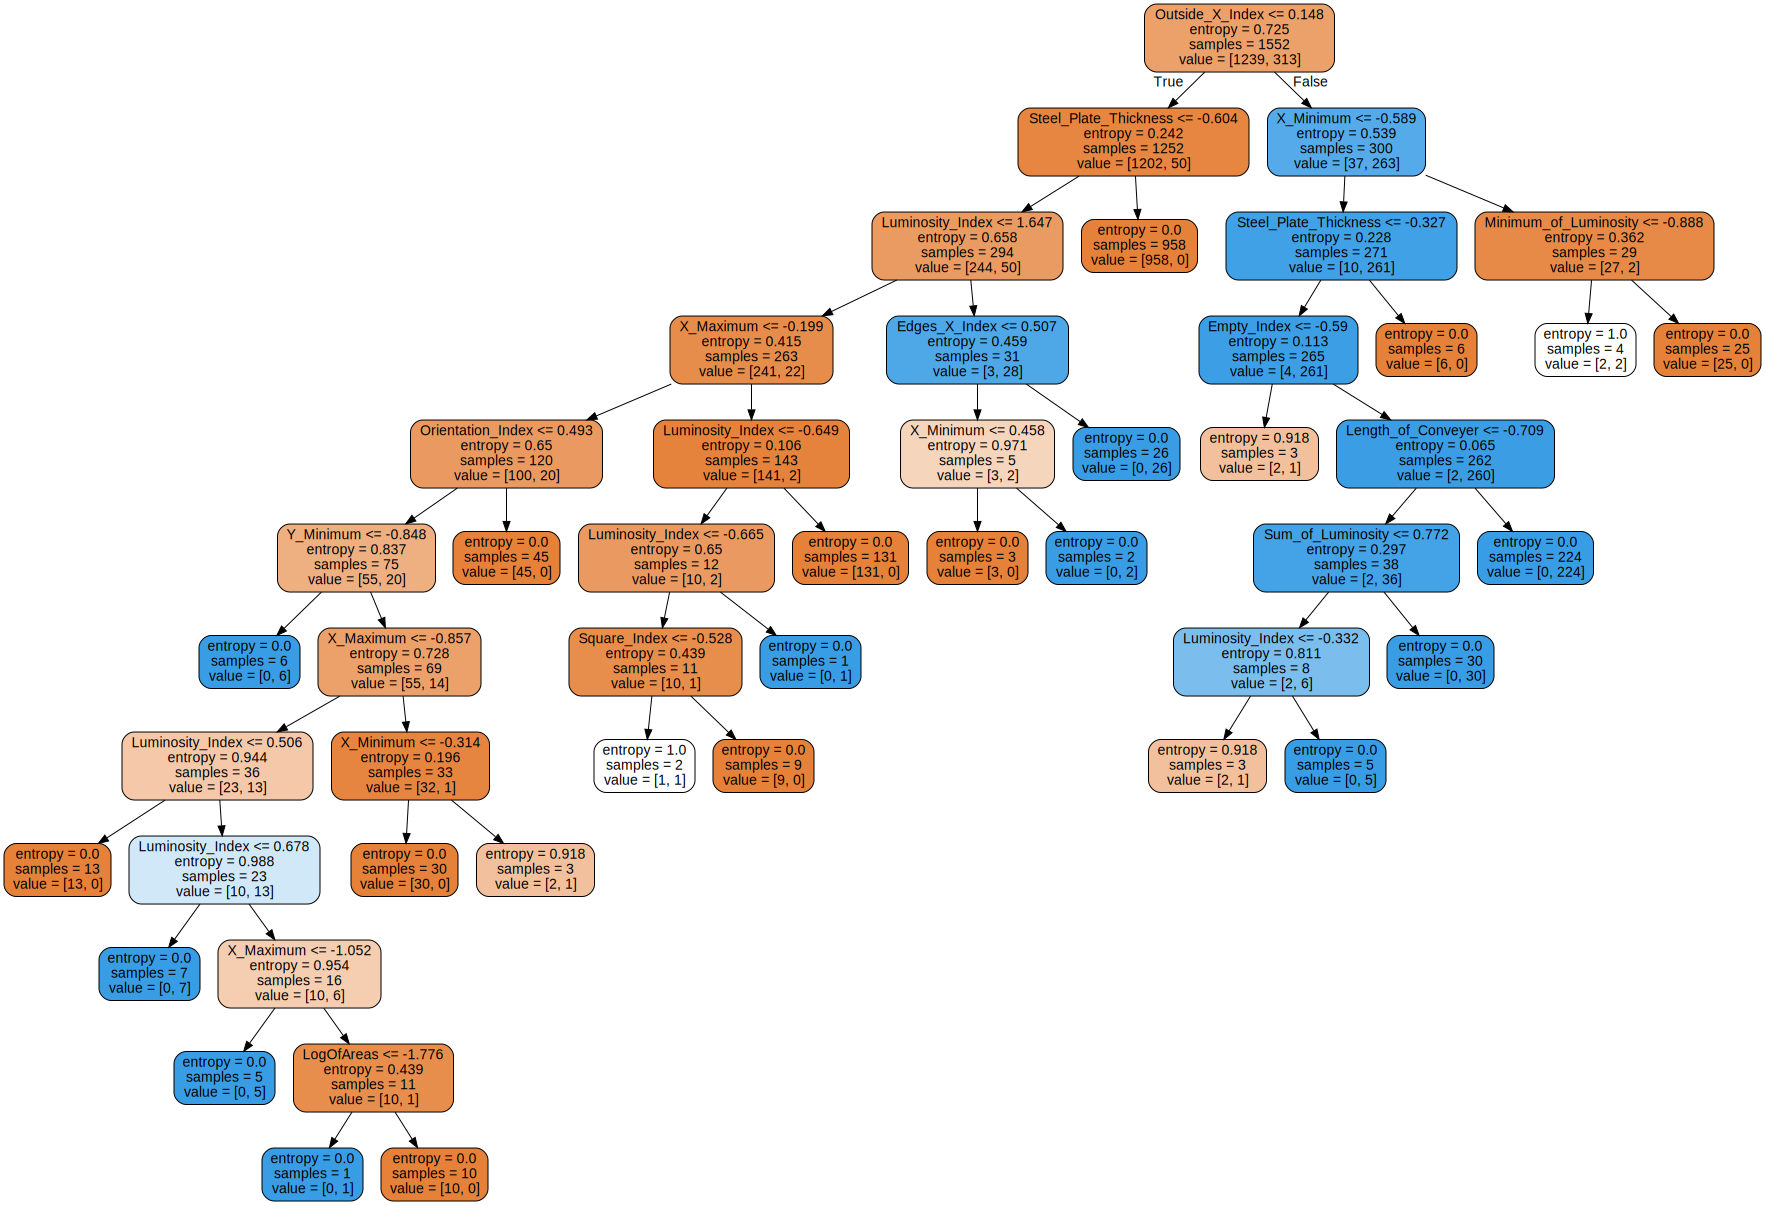

In [54]:
# 의사결정나무 시각화

import graphviz
from sklearn import tree

dt2 = DecisionTreeClassifier(criterion='entropy',max_depth=None,max_features=None,min_samples_leaf=1,min_samples_split=5)
dt2.fit(x_train,y_train)
dot_data = tree.export_graphviz(dt2,feature_names=x_train.columns,filled=True,rounded=True)
graph = graphviz.Source(dot_data)
graph

## Random Forest
- 의사결정나무의 변동성을 완화시키고 예측력을 높인 모델  
- 단점: 해석력이 떨어짐, 시간이 오래걸림  
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

1. Bagging
  - Bootstrapping: 복원추출을 통하여 샘플 구성이 조금씩 다른 여러 데이터셋을 생성
  - Aggregating: 여러 모형의 결과를 더하거나 평균을 내서 통합
2. Drop-out: Tree를 구성할 때 변수를 일부 탈락시켜서 Tree간의 correlation을 감소시킴

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf = RandomForestClassifier()

### Grid Search 구축

In [57]:
parameters = {'n_estimators':[50,100], 'criterion':['entropy'], 'min_samples_split':[2,5], 'max_depth':[None,2], 'min_samples_leaf':[1,3,10], 'max_features':['sqrt']}
GSRF = GridSearchCV(rf, parameters, cv=10, n_jobs=n_thread, scoring="accuracy") # 최적의 파라미터 찾기
GSRF.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [58]:
print('final params', GSRF.best_params_)
print('ACC.', GSRF.best_score_)

final params {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
ACC. 0.9851778329197686


### 모형 평가

In [59]:
predict = GSRF.predict(x_test)
cm = confusion_matrix(y_test, predict)

print(cm)
print("\n Accuracy:", round(GSRF.score(x_test,y_test), 2))
print(metrics.classification_report(y_test, predict))

[[311   0]
 [  5  73]]

 Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       311
           1       1.00      0.94      0.97        78

    accuracy                           0.99       389
   macro avg       0.99      0.97      0.98       389
weighted avg       0.99      0.99      0.99       389



## Support Vector Machine
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [60]:
from sklearn import svm

In [61]:
svc = svm.SVC()

### Grid Search 구축

In [62]:
# C: Error를 허용하는 정도
# kernel: 비선형 데이터를 다룰 때 사용하는 옵션

parameters = {'C':[0.01,0.1,0.5,0.9,1,5,10],'kernel':['linear','rbf','poly'],'gamma':[0.1,1,10]}
GS_SVM = GridSearchCV(svc, parameters, cv=10, n_jobs=n_thread, scoring="accuracy")
GS_SVM.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=4,
             param_grid={'C': [0.01, 0.1, 0.5, 0.9, 1, 5, 10],
                         'gamma': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [63]:
print('final params',GS_SVM.best_params_)
print('best score',GS_SVM.best_score_)

final params {'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}
best score 0.9826137303556658


### 모형 평가

In [64]:
predict = GS_SVM.predict(x_test)
cm = confusion_matrix(y_test, predict)

print(cm)
print(metrics.classification_report(y_test, predict))

[[310   1]
 [  7  71]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       311
           1       0.99      0.91      0.95        78

    accuracy                           0.98       389
   macro avg       0.98      0.95      0.97       389
weighted avg       0.98      0.98      0.98       389



## ANN(인공 신경망) 모형
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html  
https://playground.tensorflow.org

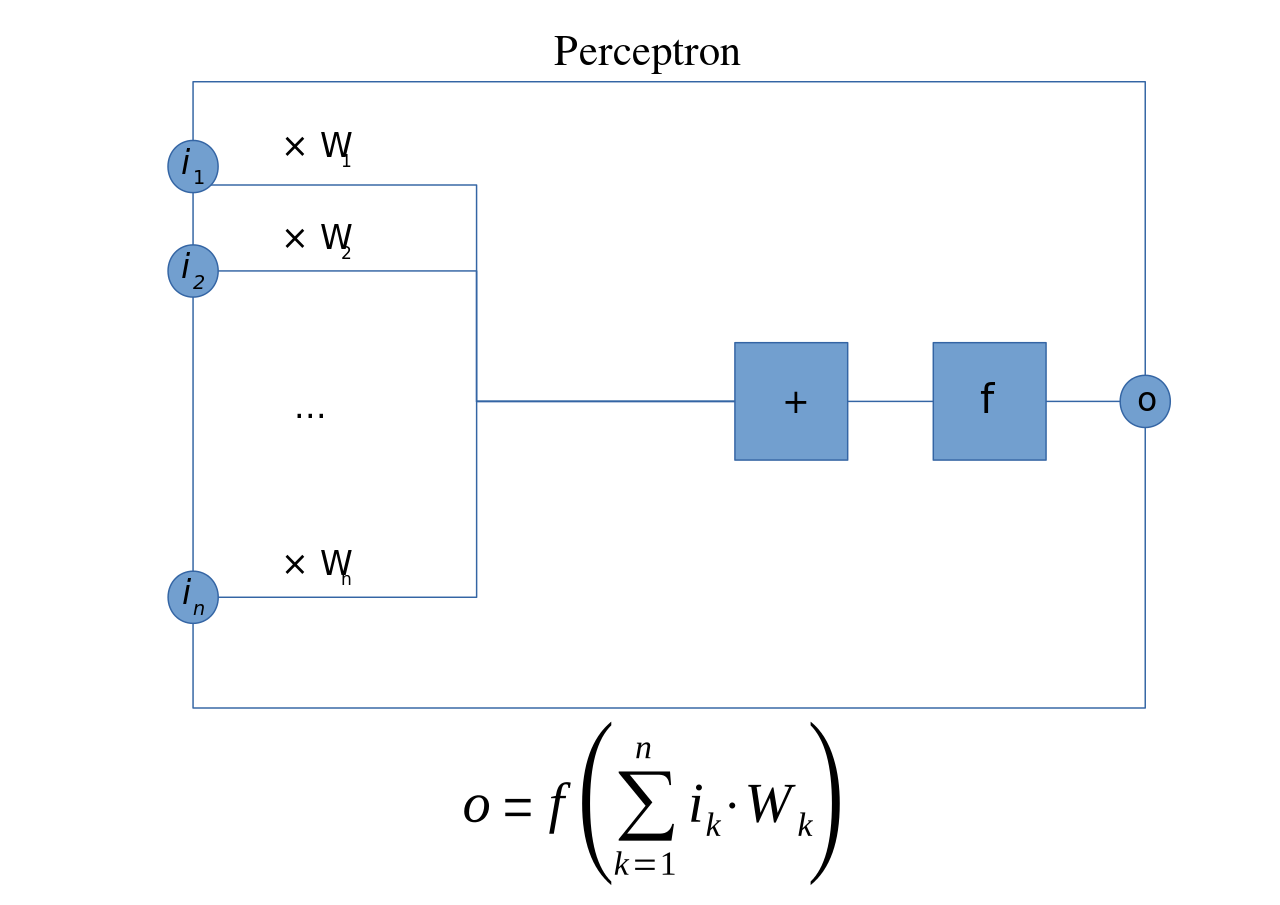

- 신경망 모형은 위와 같이 입력 데이터를 종합하여 결과값을 내는 구조를 가진 Perceptron을 중첩시키고 혼합시킨 구조이다.

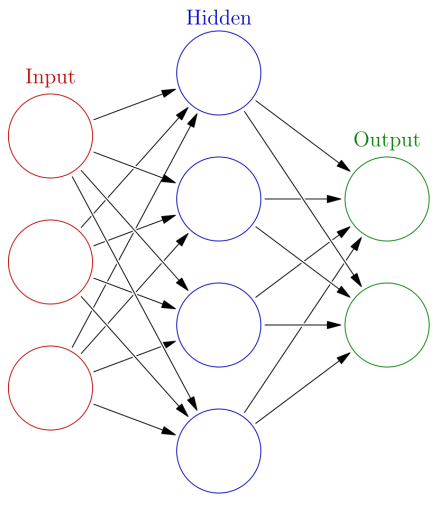

- Hidden Layer: 입력 데이터 혹은 또 다른 hidden layer의 출력값을 입력값으로 하는 perceptron이 위치하는 layer

In [65]:
from sklearn.neural_network import MLPClassifier

In [66]:
ann = MLPClassifier(random_state=1)

### Grid Search 구축

- 히든레이어는 1개로도 충분한 경우가 많음
- 히든노드의 수는 아래식을 활용하여 grid search를 통해서 찾는 것이 좋음
- 주의점: 히든레이어나 히든노드의 수를 늘려서 모델이 복잡해질수록 local minima에 빠져서 global minimum을 찾는 데 시간이 오래걸림. 즉, 수렴이 안될 수 있음. 그러나 충분한 데이터로 굉장히 어려운 문제를 풀 때는 좋음.

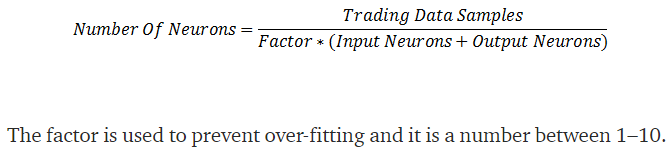

In [67]:
x_train.shape

(1552, 26)

In [68]:
1552/(10*(26+1))

5.7481481481481485

In [69]:
1552/(1*(26+1))

57.48148148148148

In [70]:
parameters = {'alpha':[1e-3,1e-1,1e1],'hidden_layer_sizes':[(5),(30),(60)],'activation':['tanh','relu'],'solver':['adam','lbfgs']}
GS_ANN=  GridSearchCV(ann, parameters, cv=10, n_jobs=n_thread, scoring="accuracy")
GS_ANN.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=4,
             param_grid={'act

In [71]:
print('final params', GS_ANN.best_params_)
print('best score', GS_ANN.best_score_)

final params {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 30, 'solver': 'lbfgs'}
best score 0.9793796526054592


In [72]:
means = GS_ANN.cv_results_['mean_test_score']
stds = GS_ANN.cv_results_['std_test_score']
params = GS_ANN.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print("%.3f (+/-%.3f) for %r"
          % (mean, std * 2, param))

0.970 (+/-0.021) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 5, 'solver': 'adam'}
0.971 (+/-0.030) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 5, 'solver': 'lbfgs'}
0.974 (+/-0.022) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 30, 'solver': 'adam'}
0.974 (+/-0.020) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 30, 'solver': 'lbfgs'}
0.977 (+/-0.025) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 60, 'solver': 'adam'}
0.976 (+/-0.021) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 60, 'solver': 'lbfgs'}
0.969 (+/-0.021) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 5, 'solver': 'adam'}
0.974 (+/-0.029) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 5, 'solver': 'lbfgs'}
0.974 (+/-0.021) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 30, 'solver': 'adam'}
0.979 (+/-0.026) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_laye

In [73]:
# 더 최적의 히든 노드의 수를 찾기 위한 과정

parameters2 = {'alpha':[1e-1],'hidden_layer_sizes':[(5),(10),(20),(30)],'activation':['tanh'],'solver':['lbfgs']}
GS_ANN2 = GridSearchCV(ann, parameters2, cv=10, n_jobs=n_thread, scoring="accuracy")
GS_ANN2.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=4,
             param_grid={'act

In [74]:
# 결과: 히든 노드의 수는 30일 때 가장 좋음

means = GS_ANN2.cv_results_['mean_test_score']
stds = GS_ANN2.cv_results_['std_test_score']
params = GS_ANN2.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print("%.3f (+/-%.3f) for %r"
          % (mean, std * 2, param))

0.974 (+/-0.029) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 5, 'solver': 'lbfgs'}
0.974 (+/-0.033) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 10, 'solver': 'lbfgs'}
0.977 (+/-0.028) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 20, 'solver': 'lbfgs'}
0.979 (+/-0.026) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 30, 'solver': 'lbfgs'}


In [75]:
# 히든레이어 수 2개나 5개일 때는 어떤지 확인
# 수렴하지 않으면 모델이 너무 복잡한 것이므로 히든레이어 수는 1개로만 진행

parameters3 = {'alpha':[1e-1],'hidden_layer_sizes':[(30,2),(30,5)],'activation':['tanh'],'solver':['lbfgs']}
GS_ANN3 = GridSearchCV(ann, parameters3, cv=10, n_jobs=n_thread, scoring="accuracy")
GS_ANN3.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=4,
             param_grid={'act

### 모형 평가

In [77]:
predict = GS_ANN2.predict(x_test)
cm = confusion_matrix(y_test, predict)

print(cm)
print(metrics.classification_report(y_test, predict))

[[309   2]
 [  2  76]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       311
           1       0.97      0.97      0.97        78

    accuracy                           0.99       389
   macro avg       0.98      0.98      0.98       389
weighted avg       0.99      0.99      0.99       389



## Boosting: XGBoost, LGBM

- 오분류된 데이터에 가중치를 더 주어 샘플링하면서 궁극적으로 합성 분류기를 구성
- 성능이 떨어지는 모델 여러개가 모여서 성능이 좋은 모델을 만들어 냄

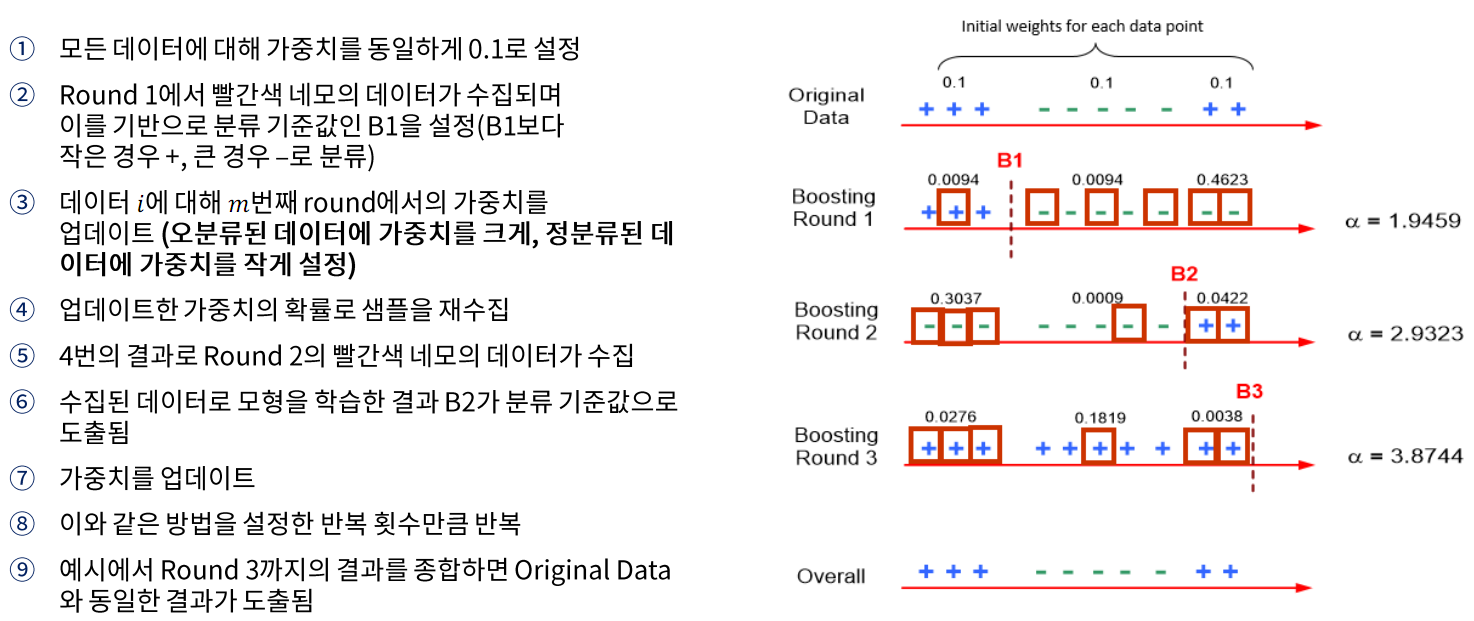

### XGBoost
- gradient boosting의 단점인 과적합을 방지하기 위해 regularization term이 추가된 형태

In [78]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [79]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic')

### Grid Search 구축
https://xgboost.readthedocs.io/en/latest/parameter.html

In [80]:
parameters = {
    'max_depth':[5,8],
    'min_child_weight':[1,5],
    'gamma':[0,1],
    'colsample_bytree':[0.8,1],
    'colsample_bylevel':[0.9,1],
    'n_estimators':[50,100]
}


In [81]:
GS_xgb = GridSearchCV(xgb_model, param_grid=parameters, cv=10, n_jobs=n_thread, scoring="accuracy")
GS_xgb.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid={'colsample_bylevel': [0.9, 1],
                         'colsample_bytree': [0.8, 1], 'gamma': [0, 1],
                         'max_depth': [5, 8], 'min_

In [82]:
# " 'colsample_bytree': 1, 'colsample_bylevel': 1 " 의미: 변수를 다 가져와서 트리나 노드를 구성해라, 모델 복잡성이 상대적으로 높음

print('final params', GS_xgb.best_params_)
print('best score', GS_xgb.best_score_)

final params {'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100}
best score 0.9851819685690654


In [83]:
parameters2 = {
    'max_depth':[3,5,7],
    'min_child_weight':[1],
    'gamma':[0],
    'colsample_bytree':[1],
    'colsample_bylevel':[1],
    'n_estimators':[100,150]
}

GS_xgb2 = GridSearchCV(xgb_model, param_grid=parameters2, cv=10, n_jobs=n_thread, scoring="accuracy")
GS_xgb2.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid={'colsample_bylevel': [1], 'colsample_bytree': [1],
                         'gamma': [0], 'max_depth': [3, 5, 7],
                         'min_child_weig

In [84]:
print('final params',GS_xgb2.best_params_)
print('best score',GS_xgb2.best_score_)

final params {'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 150}
best score 0.9851819685690655


### 모형 평가

In [85]:
predict = GS_xgb2.predict(x_test)
cm = confusion_matrix(y_test, predict)

print(cm)
print(metrics.classification_report(y_test, predict))

[[311   0]
 [  4  74]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       311
           1       1.00      0.95      0.97        78

    accuracy                           0.99       389
   macro avg       0.99      0.97      0.98       389
weighted avg       0.99      0.99      0.99       389



### lightGBM
- xgboost와 성능이 비슷하지만 빠름
- leaf-wise loss를 사용: 시간과 메모리를 절약하여 fitting 속도가 빠름
- 데이터의 수가 충분하지 않다면 과적합의 위험이 좀 더 높음

In [86]:
import lightgbm as lgb

In [87]:
lgbm_model = lgb.LGBMClassifier(objecve='binary')

### Grid Search
https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

In [89]:
# num_leaves = 2^(max_depth)

parameters = {
    'num_leaves':[32,64,128],
    'min_data_in_leaf':[1,5,10],
    'colsample_bytree':[0.8,1],
    'n_estimators':[100,150]
}

In [90]:
GS_lgbm = GridSearchCV(lgbm_model, parameters, cv=10, n_jobs=n_thread, scoring="accuracy")
GS_lgbm.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      objecve='binary', random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsample=1.0,
                                      subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=4,
             param_grid={'colsample_bytr

In [91]:
print('final params', GS_lgbm.best_params_)
print('best score', GS_lgbm.best_score_)

final params {'colsample_bytree': 0.8, 'min_data_in_leaf': 5, 'n_estimators': 150, 'num_leaves': 64}
best score 0.9864681555004136


### 모형 평가

In [92]:
predict = GS_lgbm.predict(x_test)
cm = confusion_matrix(y_test, predict)

print(cm)
print(metrics.classification_report(y_test, predict))

[[311   0]
 [  4  74]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       311
           1       1.00      0.95      0.97        78

    accuracy                           0.99       389
   macro avg       0.99      0.97      0.98       389
weighted avg       0.99      0.99      0.99       389

